# Matplotlib Visualizations

## Preperations

In [85]:
import os
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [86]:
import plotly.io as pio

In [87]:
pio.templates

Templates configuration
-----------------------
    Default template: 'seaborn'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [95]:
pio.templates["draft"] = go.layout.Template(
    layout_annotations=[
        dict(
            name="draft watermark",
            text="DRAFT",
            textangle=-30,
            opacity=0.1,
            font=dict(color="black", size=100),
            xref="paper",
            yref="paper",
            x=0.5,
            y=0.5,
            showarrow=False,
        )
    ]
)

In [96]:
pio.templates["confidental"] = go.layout.Template(
    layout_annotations=[
        dict(
            name="draft watermark",
            text="CONFIDENTAL",
            textangle=-30,
            opacity=0.1,
            font=dict(color="red", size=100),
            xref="paper",
            yref="paper",
            x=0.5,
            y=0.5,
            showarrow=False,
        )
    ]
)

In [97]:
pio.templates

Templates configuration
-----------------------
    Default template: 'seaborn+draft'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none', 'draft', 'confidental']

In [93]:
pio.templates.default = "seaborn+draft"

In [3]:
pd.set_option('display.max_rows', 10)

In [4]:
test_df = pd.read_csv('./test_data_private/2024-09-28.csv', sep=';', decimal=',')
test_df['datum'] = pd.to_datetime(test_df['datum'])
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ausgabe_haushalt  768 non-null    bool          
 1   bemerkung         232 non-null    object        
 2   datum             768 non-null    datetime64[ns]
 3   kategorie         768 non-null    object        
 4   preis             768 non-null    float64       
 5   shop              652 non-null    object        
 6   monat_jahr        768 non-null    object        
dtypes: bool(1), datetime64[ns](1), float64(1), object(4)
memory usage: 36.9+ KB


<Axes: >

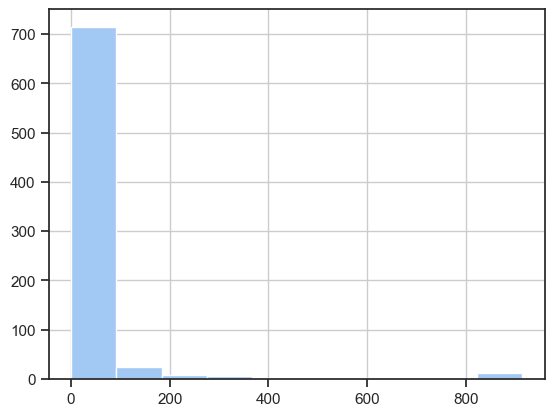

In [80]:
test_df['preis'].hist()

In [6]:
test_df['preis']

0       3.49
1      13.38
2       8.95
3      13.17
4       4.05
       ...  
763     5.70
764    50.00
765    25.04
766    18.77
767    45.00
Name: preis, Length: 768, dtype: float64

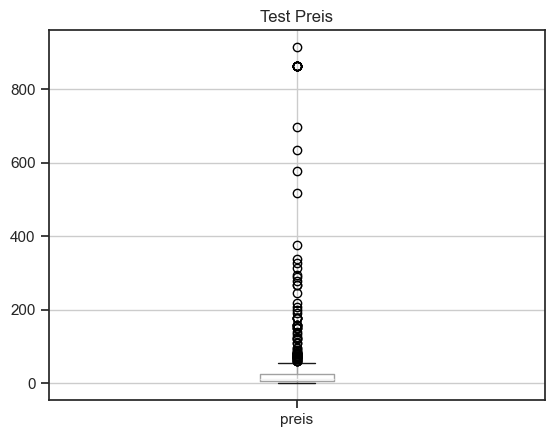

In [81]:
test_df.boxplot(column='preis')
plt.title('Test Preis')
plt.show()

In [8]:
whr = pd.read_csv('./test_data_public/WHR2024.csv')
whr = whr.replace(['Turkiye'], 'Turkey')
whr = whr.replace(['Hong Kong S.A.R. of China'], 'Hong Kong')
whr = whr.replace(['Taiwan Province of China'], 'Taiwan')
whr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                143 non-null    object 
 1   Ladder score                                143 non-null    float64
 2   upperwhisker                                143 non-null    float64
 3   lowerwhisker                                143 non-null    float64
 4   Explained by: Log GDP per capita            140 non-null    float64
 5   Explained by: Social support                140 non-null    float64
 6   Explained by: Healthy life expectancy       140 non-null    float64
 7   Explained by: Freedom to make life choices  140 non-null    float64
 8   Explained by: Generosity                    140 non-null    float64
 9   Explained by: Perceptions of corruption     140 non-null    float64
 10  Dystopia + res

In [9]:
whr.describe()

,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,143.000000,143.000000,143.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,5.527580,5.641175,5.413972,1.378807,1.134329,0.520886,0.620621,0.146271,0.154121,1.575914
std,1.170717,1.155008,1.187133,0.425098,0.333317,0.164923,0.162492,0.073441,0.126238,0.537459
min,1.721000,1.775000,1.667000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.073000
25%,4.726000,4.845500,4.606000,1.077750,0.921750,0.398000,0.527500,0.091000,0.068750,1.308250
50%,5.785000,5.895000,5.674000,1.431500,1.237500,0.549500,0.641000,0.136500,0.120500,1.644500
75%,6.416000,6.507500,6.319000,1.741500,1.383250,0.648500,0.736000,0.192500,0.193750,1.881750
max,7.741000,7.815000,7.667000,2.141000,1.617000,0.857000,0.863000,0.401000,0.575000,2.998000


<Axes: title={'center': 'test'}>

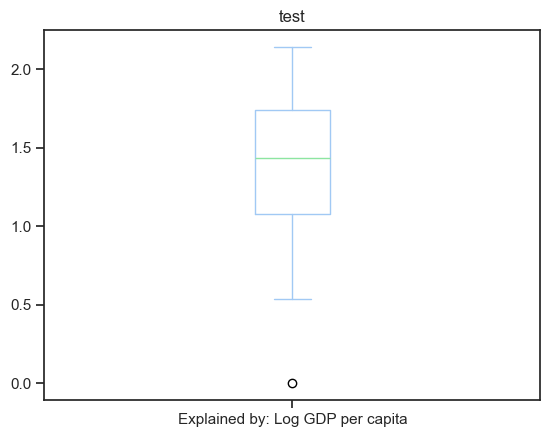

In [82]:
whr['Explained by: Log GDP per capita'].plot(kind='box', title='test')

In [11]:
contintent_df = pd.read_csv("./test_data_public/Countries by continents.csv")
contintent_df

,Continent,Country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina
...,...,...
191,South America,Paraguay
192,South America,Peru
193,South America,Suriname
194,South America,Uruguay


In [14]:
whr = whr.merge(contintent_df, left_on='Country name', right_on='Country', how='left').drop(columns='Country')

In [15]:
whr

,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Continent
0,Finland,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082,Europe
1,Denmark,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881,Europe
2,Iceland,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050,Europe
3,Sweden,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658,Europe
4,Israel,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...
138,Congo (Kinshasa),3.295,3.462,3.128,0.534,0.665,0.262,0.473,0.189,0.072,1.102,NaN
139,Sierra Leone,3.245,3.366,3.124,0.654,0.566,0.253,0.469,0.181,0.053,1.068,Africa
140,Lesotho,3.186,3.469,2.904,0.771,0.851,0.000,0.523,0.082,0.085,0.875,Africa
141,Lebanon,2.707,2.797,2.616,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,Asia


In [94]:
boxplot = px.box(whr, 
                 x='Continent', 
                 y='Explained by: Log GDP per capita', 
                 points='all',
                 notched=False,
                 hover_data=['Country name', 'Ladder score'],
                 title="Boxplot")
boxplot.update_traces(quartilemethod="linear")
boxplot.show()

In [17]:
whr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                143 non-null    object 
 1   Ladder score                                143 non-null    float64
 2   upperwhisker                                143 non-null    float64
 3   lowerwhisker                                143 non-null    float64
 4   Explained by: Log GDP per capita            140 non-null    float64
 5   Explained by: Social support                140 non-null    float64
 6   Explained by: Healthy life expectancy       140 non-null    float64
 7   Explained by: Freedom to make life choices  140 non-null    float64
 8   Explained by: Generosity                    140 non-null    float64
 9   Explained by: Perceptions of corruption     140 non-null    float64
 10  Dystopia + res

In [18]:
whr[['Country name', 'Continent']][whr[['Country name', 'Continent']]['Continent'].isnull()]

,Country name,Continent
28,Kosovo,NaN
83,North Macedonia,NaN
88,Congo (Brazzaville),NaN
102,State of Palestine,NaN
109,Burkina Faso,NaN
117,Myanmar,NaN
134,Eswatini,NaN
138,Congo (Kinshasa),NaN


In [19]:
contintent_df

,Continent,Country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina
...,...,...
191,South America,Paraguay
192,South America,Peru
193,South America,Suriname
194,South America,Uruguay


In [20]:
whr[whr['Country name'] == 'Kosovo'].index

Index([28], dtype='int64')

In [21]:
whr.loc[whr[whr['Country name'] == 'Kosovo'].index, 'Continent'] = 'Europe'

In [22]:
whr[whr['Country name'] == 'Kosovo']

,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Continent
28,Kosovo,6.561,6.667,6.455,1.364,1.277,0.599,0.739,0.254,0.073,2.255,Europe


In [23]:
heatmap = px.imshow(whr[['Ladder score', 'Explained by: Log GDP per capita', 'Explained by: Social support', 'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 'Explained by: Generosity', 'Explained by: Perceptions of corruption']].corr())
heatmap.show()

<Axes: title={'center': 'Boxplot'}>

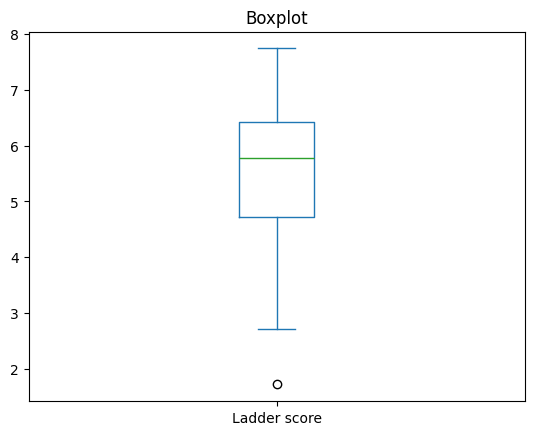

In [24]:
whr['Ladder score'].plot(kind="box", title='Boxplot')

In [25]:
whr.head()

,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Continent
0,Finland,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082,Europe
1,Denmark,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881,Europe
2,Iceland,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050,Europe
3,Sweden,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658,Europe
4,Israel,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298,Asia


In [27]:
whr['Grouping mean'] = ['Ladder score above mean' if x >= whr['Ladder score'].mean() else 'Ladder score below mean' for x in whr['Ladder score']]

In [78]:
available_templates = ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

for template in available_templates:
    boxplot = px.box(whr[whr['Explained by: Log GDP per capita']>0.0], 
                    x='Continent', 
                    y='Explained by: Log GDP per capita', 
                    color='Grouping mean',
                    points='all',
                    notched=False,
                    hover_data=['Country name', 'Ladder score'],
                    title=f"Boxplot: '{template}' Theme",
                    template=template)
    boxplot.update_traces(quartilemethod="linear")
    boxplot.show()

In [29]:
whr['Grouping median'] = ['Ladder score above median' if x >= whr['Ladder score'].median() else 'Ladder score below median' for x in whr['Ladder score']]

In [30]:
whr['Grouping mean'].value_counts()

Grouping mean
Ladder score above mean    80
Ladder score below mean    63
Name: count, dtype: int64

In [31]:
whr['Grouping median'].value_counts()

Grouping median
Ladder score above median    72
Ladder score below median    71
Name: count, dtype: int64

In [32]:
boxplot = px.box(whr, 
                 x='Continent', 
                 y='Explained by: Log GDP per capita', 
                 color='Grouping median',
                 points='all',
                 notched=False,
                 hover_data=['Country name', 'Ladder score'],
                 title="Boxplot")
boxplot.update_traces(quartilemethod="linear")
boxplot.show()

In [33]:
tips = sns.load_dataset("tips")

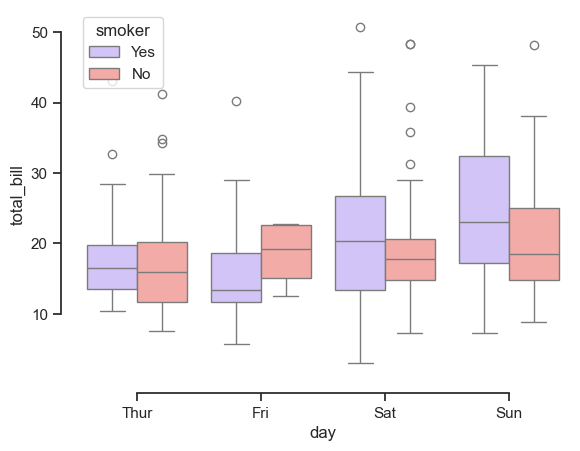

In [42]:
sns.set_theme(style='ticks', palette='pastel')

sns.boxplot(x='day',
            y='total_bill',
            hue='smoker',
            palette=['m', 'r'],
            data=tips)

sns.despine(offset=10, trim=True)

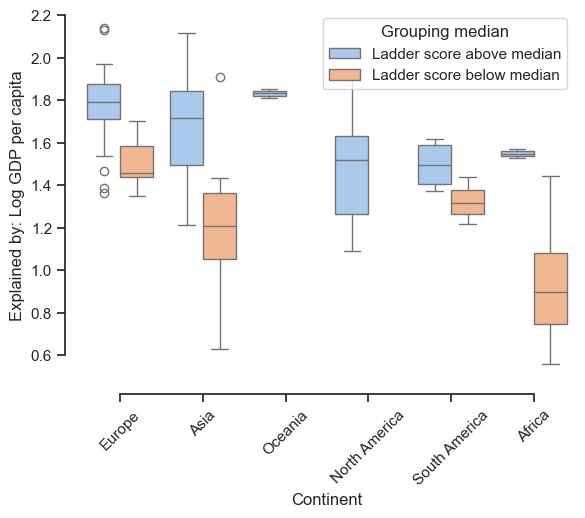

In [60]:
ax = sns.boxplot(x='Continent',
            y='Explained by: Log GDP per capita',
            hue='Grouping median',
            data=whr[whr['Explained by: Log GDP per capita'] > 0.0])
sns.despine(offset=10, trim=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);



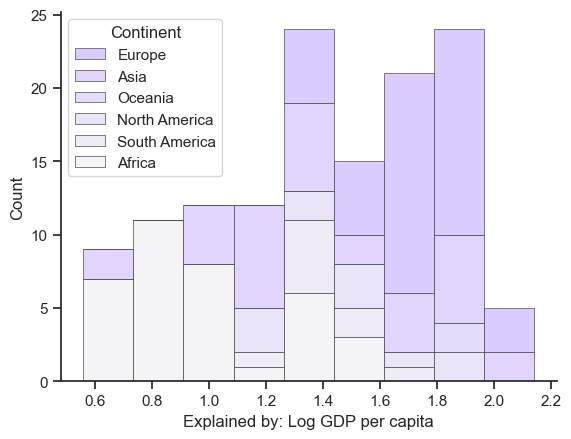

In [68]:
ax = sns.histplot(
    data=whr[whr['Explained by: Log GDP per capita']>0.0],
    x='Explained by: Log GDP per capita',
    hue='Continent',
    multiple='stack',
    palette='light:m_r',
    edgecolor='.3',
    linewidth=.5
)

sns.despine()

ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())